In [ ]:
 import sympy
 import scipy
 import numpy as np
 import matplotlib.pyplot as plt
 from numpy.polynomial import Polynomial
 from IPython.display import display, Math
 from sympy.functions.special.polynomials import legendre
 from sympy import *
 import sympy as sp
 from scipy import *

In [ ]:
x, f, g= sp.symbols('x f g')

In [ ]:
basis = [x**i for i in range(10)]

In [ ]:
#a) mostrar que la base de funciones no es ortogonal
def inner_product(f, g):
    return sp.integrate(f*g, (x, -1, 1))

In [ ]:
#buscamos hacer el producto interno de cada combinacion de monomios
print("productos internos entre monomios:")
for i in range(len(basis)):
    for j in range(i+1, len(basis)):  # j siempre > i
        val = inner_product(basis[i], basis[j])
        print(f"<{basis[i]} | {basis[j]}> = {val}")

productos internos entre monomios:
<1 | x> = 0
<1 | x**2> = 2/3
<1 | x**3> = 0
<1 | x**4> = 2/5
<1 | x**5> = 0
<1 | x**6> = 2/7
<1 | x**7> = 0
<1 | x**8> = 2/9
<1 | x**9> = 0
<x | x**2> = 0
<x | x**3> = 2/5
<x | x**4> = 0
<x | x**5> = 2/7
<x | x**6> = 0
<x | x**7> = 2/9
<x | x**8> = 0
<x | x**9> = 2/11
<x**2 | x**3> = 0
<x**2 | x**4> = 2/7
<x**2 | x**5> = 0
<x**2 | x**6> = 2/9
<x**2 | x**7> = 0
<x**2 | x**8> = 2/11
<x**2 | x**9> = 0
<x**3 | x**4> = 0
<x**3 | x**5> = 2/9
<x**3 | x**6> = 0
<x**3 | x**7> = 2/11
<x**3 | x**8> = 0
<x**3 | x**9> = 2/13
<x**4 | x**5> = 0
<x**4 | x**6> = 2/11
<x**4 | x**7> = 0
<x**4 | x**8> = 2/13
<x**4 | x**9> = 0
<x**5 | x**6> = 0
<x**5 | x**7> = 2/13
<x**5 | x**8> = 0
<x**5 | x**9> = 2/15
<x**6 | x**7> = 0
<x**6 | x**8> = 2/15
<x**6 | x**9> = 0
<x**7 | x**8> = 0
<x**7 | x**9> = 2/17
<x**8 | x**9> = 0


In [ ]:
#b) ortogonalize la base y encuentre los 10 primeros vectores ortogonales
def gram_schmidt(basis_list):
  ortho = []
  for i in range(len(basis)):
    for j in range(i+1, len(basis)):
        num = inner_product(basis[i], basis[j])
        den = inner_product(basis[j], basis[j])
        proj = (num/den) * basis[j]
        basis[i] = basis[i] - proj
        ortho.append(basis[i])
    return ortho
print(gram_schmidt(basis))

[1, 1 - 5*x**2/3, 1 - 5*x**2/3, 12*x**4/35 - 5*x**2/3 + 1, 12*x**4/35 - 5*x**2/3 + 1, 1508*x**6/10395 + 12*x**4/35 - 5*x**2/3 + 1, 1508*x**6/10395 + 12*x**4/35 - 5*x**2/3 + 1, 150212*x**8/2027025 + 1508*x**6/10395 + 12*x**4/35 - 5*x**2/3 + 1, 150212*x**8/2027025 + 1508*x**6/10395 + 12*x**4/35 - 5*x**2/3 + 1]


In [ ]:
#c)polinomios de chebyshev, encontrar los 10 primeros vectores
basis = [x**i for i in range(10)]  # primeros 10 monomios

#se define una nueva funcion h(x)
h = sp.sqrt(1 - x**2)

# Producto interno usando integración numérica (trapecios)
def inner_product2(f, g, N=2000):
    f_l = sp.lambdify(x, f, "numpy")
    g_l = sp.lambdify(x, g, "numpy")

    xs = np.linspace(-1, 1, N)
    w = np.sqrt(1 - xs**2)  # peso de Chebyshev
    vals = f_l(xs) * g_l(xs) * w

    return np.trapz(vals, xs)

# Gram-Schmidt ortogonalización
def gram_schmidt(basis):
    ortho = []
    for i in range(len(basis)):
        fi = basis[i]
        for g in ortho:
            num = inner_product2(fi, g)
            den = inner_product2(g, g)
            fi = fi - (num/den) * g
        ortho.append(sp.simplify(fi))
    return ortho

# Ejecutar
ortho_basis = gram_schmidt(basis)

# Imprimir los primeros 10 vectores ortogonales aproximados
for i, poly in enumerate(ortho_basis):
    print(f"Polinomio ortogonal {i}: {poly}")

/tmp/ipython-input-1451416299.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(vals, xs)


Polinomio ortogonal 0: 1
Polinomio ortogonal 1: x - 3.53399150892301e-17
Polinomio ortogonal 2: x**2 - 3.53411706233945e-17*x - 0.249991118473566
Polinomio ortogonal 3: x**3 - 0.49997632478519*x + 3.5339078409149e-17
Polinomio ortogonal 4: x**4 - 3.53461877950094e-17*x**3 - 0.749955631303252*x**2 + 2.65059816830824e-17*x + 0.0624926064316966
Polinomio ortogonal 5: x**5 + 3.53499457929354e-17*x**4 - 0.999929054190885*x**3 + 8.83237113853788e-18*x**2 + 0.187473399701029*x - 3.9755368095529e-17
Polinomio ortogonal 6: x**6 + 3.53545335968926e-17*x**5 - 1.24989661277892*x**4 + 4.41732428537385e-17*x**3 + 0.374937977907251*x**2 - 1.54617663789093e-17*x - 0.015621124259534
Polinomio ortogonal 7: x**7 + 3.53599484515493e-17*x**6 - 1.49985832896564*x**5 - 2.65162988377757e-17*x**4 + 0.624881960357766*x**3 - 5.30112996726764e-17*x**2 - 0.062482296988162*x + 4.03054799029647e-17
Polinomio ortogonal 8: x**8 - 1.74981422664504*x**6 + 1.14908802120221e-16*x**5 + 0.937300990211361*x**4 - 1.7453374110

In [ ]:
#d)I.Expanda la función h(x) en términos de la base de monomios y de polinomios de Legendre
h = sp.sin(3*x)*(1-x**2)
#la funcion h(x) expandida en sus monomios
m = sp.sin(3*x)
y = (-x**2)*(sp.sin(3*x))
new_basis = [m, y]

In [ ]:
#expansion de h en terminos de la base de monomios
def inner_product(f, g):
    return sp.integrate(f * g, (x, -1, 1))
def monomial_projection(h_expr, N):
    # Construcción de matriz Gram y vector b
    G = sp.zeros(N+1, N+1)
    b = sp.zeros(N+1, 1)

    for i in range(N+1):
        for j in range(N+1):
            G[i,j] = sp.integrate(x**i * x**j, (x, -1, 1))
        b[i] = sp.integrate(h_expr * x**i, (x, -1, 1))

    # Resolver el sistema lineal G c = b
    c = G.LUsolve(b)
    p = sum(c[k]*x**k for k in range(N+1))
    return sp.simplify(p), [sp.simplify(ci) for ci in c]

p3, coeffs3 = monomial_projection(h, 7)
print("Proyección grado 3:", p3)
print("Coeficientes:", coeffs3)

Proyección grado 3: x*(x**6*(8494200*cos(3) + 59581665*sin(3)) + x**4*(-96795699*sin(3) - 13801788*cos(3)) + x**2*(6329400*cos(3) + 44368555*sin(3)) - 4998105*sin(3) - 714420*cos(3))/648
Coeficientes: [0, -61705*sin(3)/8 - 2205*cos(3)/2, 0, 263725*cos(3)/27 + 44368555*sin(3)/648, 0, -32265233*sin(3)/216 - 383383*cos(3)/18, 0, 39325*cos(3)/3 + 6620185*sin(3)/72]


In [ ]:
serie_monomios = sp.series(h, x, 0, 15).removeO()
print("Expansión en monomios:")
print(serie_monomios)

Expansión en monomios:
2187*x**13/465920 - 4131*x**11/70400 + 2187*x**9/4480 - 1377*x**7/560 + 261*x**5/40 - 15*x**3/2 + 3*x


In [ ]:
x = sp.symbols('x')
h = (1 - x**2) * sp.sin(3*x)

# malla para graficar
xs = np.linspace(-1.0, 1.0, 1001)
h_num = sp.lambdify(x, h, 'numpy')(xs)
def inner_leg_num(f_expr, g_expr, nquad=300):
    xn, wn = np.polynomial.legendre.leggauss(nquad)   # nodos y pesos en [-1,1]
    fvals = sp.lambdify(x, f_expr, 'numpy')(xn)
    gvals = sp.lambdify(x, g_expr, 'numpy')(xn)
    return np.sum(wn * fvals * gvals)
def legendre_projection(h_expr, N, nquad=300):
    poly = 0
    coeffs = []
    for n in range(N+1):
        Pn = sp.legendre(n, x)
        num = inner_leg_num(h_expr, Pn, nquad=nquad)
        den = inner_leg_num(Pn, Pn, nquad=nquad)
        cn = num/den
        coeffs.append((n, cn))
        poly += cn * Pn
    return sp.simplify(poly), coeffs
N = 12
h_leg_sym, coeffs_leg = legendre_projection(h, N, nquad=300)
h_leg_vals = sp.lambdify(x, h_leg_sym, 'numpy')(xs)
print(legendre_projection(h, 12))

(-0.0455509340730817*x**11 - 3.2863828032614e-15*x**10 + 0.47305775720479*x**9 + 7.78353821825069e-15*x**8 - 2.45045690692399*x**7 - 6.4099726503241e-15*x**6 + 6.52268591889094*x**5 + 2.27326702384121e-15*x**4 - 7.49972983474944*x**3 - 3.63631244256286e-16*x**2 + 2.99999104364589*x + 1.61918818197136e-17, [(0, np.float64(0.0)), (1, np.float64(0.5972749941514724)), (2, np.float64(0.0)), (3, np.float64(-0.9716064230104444)), (4, np.float64(3.1225022567583015e-17)), (5, np.float64(0.42997278399643885)), (6, np.float64(0.0)), (7, np.float64(-0.05923736528792265)), (8, np.float64(0.0)), (9, np.float64(0.0037252969598714214)), (10, np.float64(-1.8214596497757448e-17)), (11, np.float64(-0.00013224281430622827)), (12, np.float64(0.0))])


In [ ]:
sp.init_printing(use_unicode=True)
h = (1 - x**2) * sp.sin(3*x)

# producto interno en [-1,1]
def inner_product(f, g):
    return sp.simplify(sp.integrate(f*g, (x, -1, 1)))

# calcula coeficientes c_n = <h,Pn> / <Pn,Pn>
def legendre_coeffs(h, N):
    coeffs = []
    for n in range(N+1):
        Pn = sp.legendre(n, x)
        num = inner_product(h, Pn)
        den = inner_product(Pn, Pn)
        cn = sp.simplify(num/den)
        cn = sp.trigsimp(sp.factor(cn))   # limpiar la forma trig
        coeffs.append((n, cn, Pn))
    return coeffs
N = 7
rows = legendre_coeffs(h, N)
latex_rows = []
for (n, cn, Pn) in rows:
    term = sp.simplify(cn * Pn)
    if sp.simplify(cn) == 0:
        term_latex = "0"
    else:
        term_latex = sp.latex(term)
    left_label = f"P_{{{n}}}(x)"
    latex_rows.append(f"{left_label} & {term_latex}")
latex_array = r"\left[\begin{array}{r l}" + r" \\ ".join(latex_rows) + r"\end{array}\right]"
display(Math(latex_array))

<IPython.core.display.Math object>

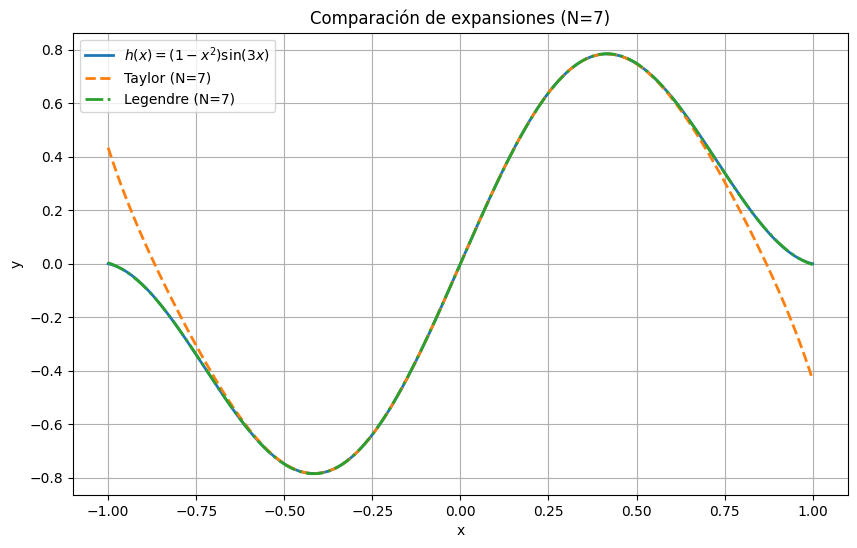

In [ ]:
taylor_exp = sp.series(h, x, 0, N+1).removeO()

# Serie de Legendre
def inner_product(f, g):
    return sp.integrate(f*g, (x, -1, 1))

def legendre_expansion(h, N):
    expansion = 0
    for n in range(N+1):
        Pn = sp.legendre(n, x)
        cn = inner_product(h, Pn) / inner_product(Pn, Pn)
        expansion += sp.simplify(cn * Pn)
    return expansion

legendre_exp = legendre_expansion(h, N)

# --- 3. Funciones numéricas ---
h_num = sp.lambdify(x, h, "numpy")
taylor_num = sp.lambdify(x, taylor_exp, "numpy")
legendre_num = sp.lambdify(x, legendre_exp, "numpy")

# --- 4. Muestreo ---
xs = np.linspace(-1, 1, 1000)
ys = h_num(xs)
ys_taylor = taylor_num(xs)
ys_legendre = legendre_num(xs)

# --- 5. Gráfica ---
plt.figure(figsize=(10,6))
plt.plot(xs, ys, label=r"$h(x)=(1-x^2)\sin(3x)$", linewidth=2)
plt.plot(xs, ys_taylor, "--", label=f"Taylor (N={N})", linewidth=2)
plt.plot(xs, ys_legendre, "-.", label=f"Legendre (N={N})", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Comparación de expansiones (N={N})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#II)Expanda la función h(x) en términos de la base de monomios y de polinomios de chebyshevdef inner_product3_num(f, g, npts=200):
def inner_chebyshevT_gauss(f_expr, g_expr, npts=400):
    k = np.arange(1, npts+1)
    xk = np.cos((2*k-1)*np.pi/(2*npts))   # nodos de Gauss-Chebyshev
    w = np.pi / npts                       # peso constante
    fvals = sp.lambdify(x, f_expr, 'numpy')(xk)
    gvals = sp.lambdify(x, g_expr, 'numpy')(xk)
    return np.sum(fvals * gvals) * w       # **no** volver a multiplicar por 1/sqrt(1-x^2)
def chebyshevT_projection(h_expr, N, npts=400):
    poly = 0
    coeffs = []
    for n in range(N+1):
        Tn = sp.chebyshevt(n, x)
        num = inner_chebyshevT_gauss(h_expr, Tn, npts=npts)
        den = inner_chebyshevT_gauss(Tn, Tn, npts=npts)
        cn = num/den
        coeffs.append((n, cn))
        poly += cn * Tn
    return sp.simplify(poly), coeffs
N = 12
h_chebT_sym, coeffs_chebT = chebyshevT_projection(h, N, npts=400)
h_chebT_vals = sp.lambdify(x, h_chebT_sym, 'numpy')(xs)
for n, cn, Pn in rows:
    print(f"n={n}, coef={cn:.6f}, Pn={Pn}")

n=0, coef=0.000000, Pn=1
n=1, coef=0.597275, Pn=x
n=2, coef=0.000000, Pn=3*x**2/2 - 1/2
n=3, coef=-0.971606, Pn=5*x**3/2 - 3*x/2
n=4, coef=0.000000, Pn=35*x**4/8 - 15*x**2/4 + 3/8
n=5, coef=0.429973, Pn=63*x**5/8 - 35*x**3/4 + 15*x/8
n=6, coef=0.000000, Pn=231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
n=7, coef=-0.059237, Pn=429*x**7/16 - 693*x**5/16 + 315*x**3/16 - 35*x/16


/tmp/ipython-input-1686003430.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yvals = np.full_like(xs, float(yvals))


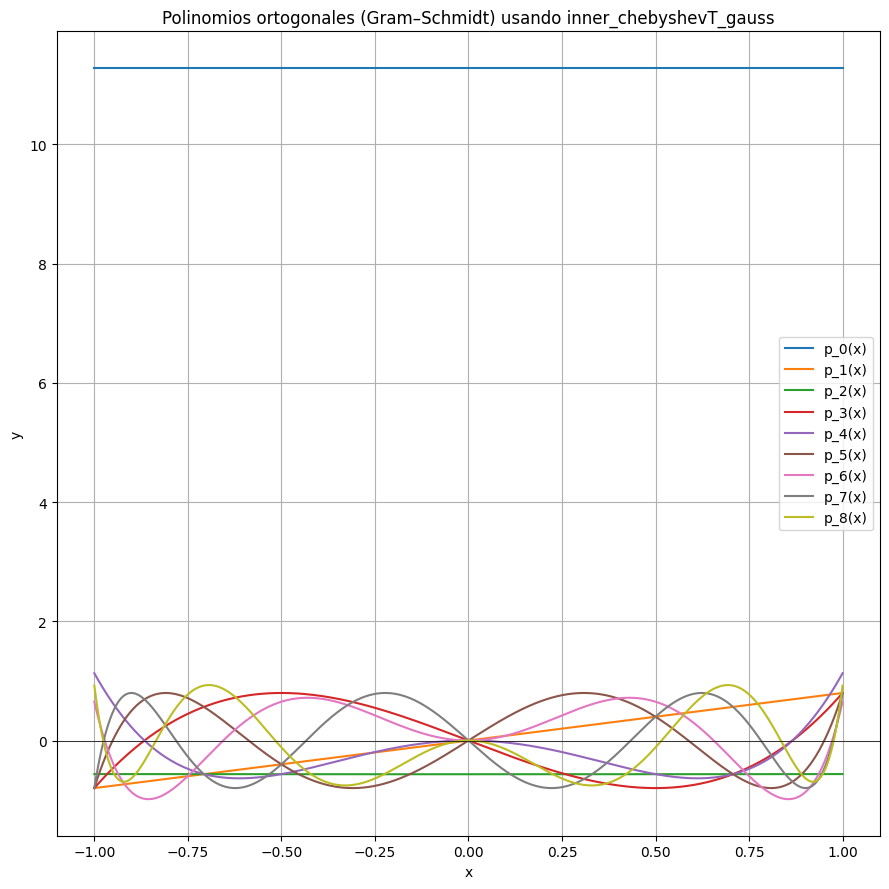

Normas numéricas (sqrt de <p,p>):
 p_0: norm = 8.862269e-02
 p_1: norm = 1.253314e+00
 p_2: norm = 3.536051e+02
 p_3: norm = 3.133285e-01
 p_4: norm = 2.215566e-01
 p_5: norm = 7.833213e-02
 p_6: norm = 4.796843e-02
 p_7: norm = 1.958303e-02
 p_8: norm = 1.130627e-02


In [ ]:

# parámetros (usa los tuyos si ya existen)
N = globals().get('N', 12)
npts = globals().get('npts', 400)   # pasa este valor a inner_chebyshevT_gauss si quieres
xs = globals().get('xs', np.linspace(-1.0, 1.0, 1001))

monomials = [sp.simplify(x**k) for k in range(N+1)]
ortho = []
norms = []
tol = 1e-14

for p in monomials:
    v = sp.simplify(p)
    for q in ortho:
        num = inner_chebyshevT_gauss(v, q, npts=npts)   # float
        den = inner_chebyshevT_gauss(q, q, npts=npts)   # float
        if abs(den) < 1e-16:
            continue
        v = sp.simplify(v - (num/den) * q)
    # norma numérica y normalización
    norm_sq = inner_chebyshevT_gauss(v, v, npts=npts)
    if abs(norm_sq) <= tol:
        ortho.append(sp.sympify(0))
        norms.append(0.0)
    else:
        norm = float(np.sqrt(abs(norm_sq)))
        v_normed = sp.simplify(v / norm)
        ortho.append(v_normed)
        norms.append(norm)
K = min(9, len(ortho))
plt.figure(figsize=(9,9))
any_plotted = False
for k in range(K):
    poly_sym = ortho[k]
    if poly_sym == 0:
        continue
    f = sp.lambdify(x, poly_sym, 'numpy')  # convierto a función NumPy
    yvals = f(xs)                          # evalúo en xs (debe dar array 1D)
    yvals = np.ravel(yvals)
    if yvals.size == 1:  # constante
        yvals = np.full_like(xs, float(yvals))
    plt.plot(xs, yvals, label=f"p_{k}(x)")
    any_plotted = True

if not any_plotted:
    raise RuntimeError("No se graficó ningún polinomio: todos los polinomios resultaron nulos. Intenta aumentar npts.")

plt.axhline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Polinomios ortogonales (Gram–Schmidt) usando inner_chebyshevT_gauss")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.tight_layout()
plt.show()

# ------------- imprimir normas para verificación -------------
print("Normas numéricas (sqrt de <p,p>):")
for i in range(K):
    print(f" p_{i}: norm = {norms[i]:.6e}")


Primeros 6 valores (h, leg, chebT):
x=-1.000  h=-0.000000  leg=+0.000003  chebT=+0.000001
x=-0.800  h=-0.243167  leg=-0.243167  chebT=-0.243167
x=-0.500  h=-0.748121  leg=-0.748121  chebT=-0.748121
x=+0.000  h=+0.000000  leg=+0.000000  chebT=-0.000000
x=+0.500  h=+0.748121  leg=+0.748121  chebT=+0.748121
x=+1.000  h=+0.000000  leg=-0.000003  chebT=-0.000001

Normas de residuo:
Legendre   ||res||_2 = 1.853e-05, ||res||_inf = 2.956e-06
ChebyshevT ||res||_2 = 2.077e-05, ||res||_inf = 9.371e-07


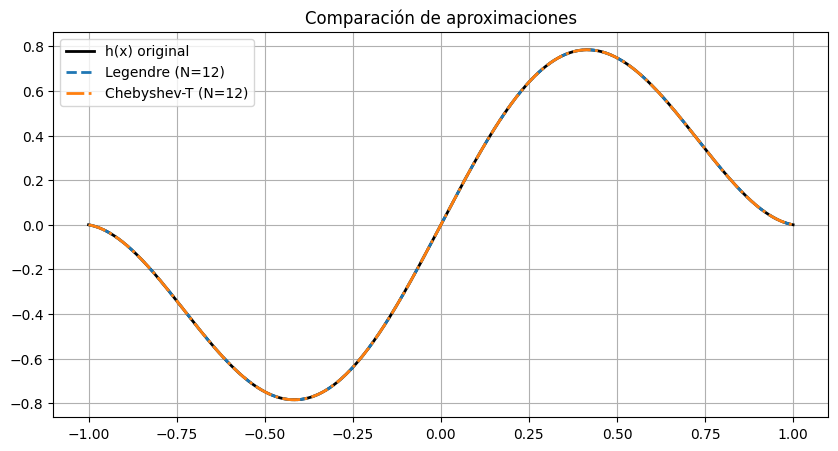

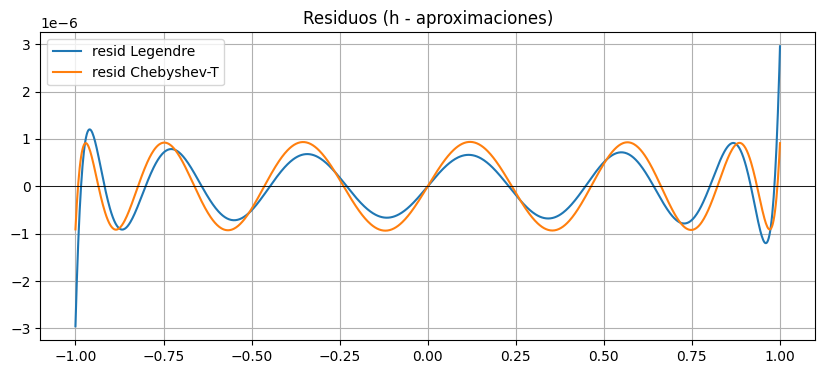

In [ ]:
# malla para graficar (fija y explícita)
xs = np.linspace(-1.0, 1.0, 1001)
h_num = sp.lambdify(x, h, 'numpy')(xs)

# 2) Producto interno numérico para Legendre: ∫_{-1}^1 f g dx  (Gauss-Legendre)
def inner_leg_num(f_expr, g_expr, nquad=300):
    xn, wn = np.polynomial.legendre.leggauss(nquad)   # nodos y pesos en [-1,1]
    fvals = sp.lambdify(x, f_expr, 'numpy')(xn)
    gvals = sp.lambdify(x, g_expr, 'numpy')(xn)
    return np.sum(wn * fvals * gvals)

# 3) Producto interno numérico para Chebyshev-T: ∫_{-1}^1 f g (1/sqrt(1-x^2)) dx
#    usando cuadratura de Gauss-Chebyshev (N nodos): I ≈ (π/N) * sum_k f(x_k) g(x_k)
def inner_chebyshevT_gauss(f_expr, g_expr, npts=400):
    k = np.arange(1, npts+1)
    xk = np.cos((2*k-1)*np.pi/(2*npts))   # nodos de Gauss-Chebyshev
    w = np.pi / npts                       # peso constante
    fvals = sp.lambdify(x, f_expr, 'numpy')(xk)
    gvals = sp.lambdify(x, g_expr, 'numpy')(xk)
    return np.sum(fvals * gvals) * w       # **no** volver a multiplicar por 1/sqrt(1-x^2)

# 4) Proyección en Legendre (base P_n)
def legendre_projection(h_expr, N, nquad=300):
    poly = 0
    coeffs = []
    for n in range(N+1):
        Pn = sp.legendre(n, x)
        num = inner_leg_num(h_expr, Pn, nquad=nquad)
        den = inner_leg_num(Pn, Pn, nquad=nquad)
        cn = num/den
        coeffs.append((n, cn))
        poly += cn * Pn
    return sp.simplify(poly), coeffs

# 5) Proyección en Chebyshev-T (base T_n) con Gauss-Chebyshev
def chebyshevT_projection(h_expr, N, npts=400):
    poly = 0
    coeffs = []
    for n in range(N+1):
        Tn = sp.chebyshevt(n, x)
        num = inner_chebyshevT_gauss(h_expr, Tn, npts=npts)
        den = inner_chebyshevT_gauss(Tn, Tn, npts=npts)
        cn = num/den
        coeffs.append((n, cn))
        poly += cn * Tn
    return sp.simplify(poly), coeffs


N = 12
h_leg_sym, coeffs_leg = legendre_projection(h, N, nquad=300)
h_chebT_sym, coeffs_chebT = chebyshevT_projection(h, N, npts=400)

# Evaluar numéricamente
h_leg_vals = sp.lambdify(x, h_leg_sym, 'numpy')(xs)
h_chebT_vals = sp.lambdify(x, h_chebT_sym, 'numpy')(xs)

# Diagnóstico rápido (primeros valores)
print("Primeros 6 valores (h, leg, chebT):")
for i in [0,100,250,500,750,1000]:
    print(f"x={xs[i]:+.3f}  h={h_num[i]:+.6f}  leg={h_leg_vals[i]:+.6f}  chebT={h_chebT_vals[i]:+.6f}")

# Normas del residuo
res_leg = h_num - h_leg_vals
res_cheb = h_num - h_chebT_vals
print("\nNormas de residuo:")
print("Legendre   ||res||_2 = {:.3e}, ||res||_inf = {:.3e}".format(np.linalg.norm(res_leg), np.max(np.abs(res_leg))))
print("ChebyshevT ||res||_2 = {:.3e}, ||res||_inf = {:.3e}".format(np.linalg.norm(res_cheb), np.max(np.abs(res_cheb))))

# Graficas (superpuestas) + residuos
plt.figure(figsize=(10,5))
plt.plot(xs, h_num, 'k', lw=2, label='h(x) original')
plt.plot(xs, h_leg_vals, '--', lw=2, label=f'Legendre (N={N})')
plt.plot(xs, h_chebT_vals, '-.', lw=2, label=f'Chebyshev-T (N={N})')
plt.legend(); plt.grid(True); plt.title('Comparación de aproximaciones')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(xs, res_leg, label='resid Legendre')
plt.plot(xs, res_cheb, label='resid Chebyshev-T')
plt.axhline(0, color='k', lw=0.6)
plt.legend(); plt.grid(True); plt.title('Residuos (h - aproximaciones)')
plt.show()

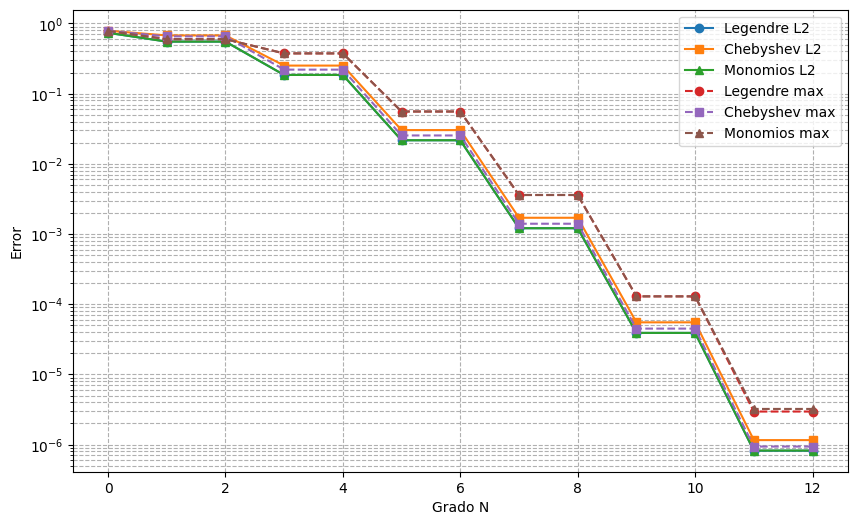

N= 0 | Leg L2=7.360e-01  Cheb L2=7.879e-01  Mono L2=7.360e-01 || Leg max=7.842e-01  Cheb max=7.842e-01  Mono max=7.842e-01
N= 1 | Leg L2=5.512e-01  Cheb L2=6.752e-01  Mono L2=5.512e-01 || Leg max=5.973e-01  Cheb max=6.544e-01  Mono max=5.973e-01
N= 2 | Leg L2=5.512e-01  Cheb L2=6.752e-01  Mono L2=5.512e-01 || Leg max=5.973e-01  Cheb max=6.544e-01  Mono max=5.973e-01
N= 3 | Leg L2=1.846e-01  Cheb L2=2.510e-01  Mono L2=1.846e-01 || Leg max=3.743e-01  Cheb max=2.198e-01  Mono max=3.743e-01
N= 4 | Leg L2=1.846e-01  Cheb L2=2.510e-01  Mono L2=1.846e-01 || Leg max=3.743e-01  Cheb max=2.198e-01  Mono max=3.743e-01
N= 5 | Leg L2=2.166e-02  Cheb L2=3.026e-02  Mono L2=2.166e-02 || Leg max=5.564e-02  Cheb max=2.537e-02  Mono max=5.564e-02
N= 6 | Leg L2=2.166e-02  Cheb L2=3.026e-02  Mono L2=2.166e-02 || Leg max=5.564e-02  Cheb max=2.537e-02  Mono max=5.564e-02
N= 7 | Leg L2=1.209e-03  Cheb L2=1.704e-03  Mono L2=1.209e-03 || Leg max=3.596e-03  Cheb max=1.401e-03  Mono max=3.596e-03
N= 8 | Leg L2=1.

In [ ]:
# d) IV.Error que se comete como funcion del grado del polinomio
import numpy as np, sympy as sp, matplotlib.pyplot as plt

# comprobación mínima
need = ['h','x','xs','legendre_projection','chebyshevT_projection','monomial_projection',
        'inner_leg_num','inner_chebyshevT_gauss','inner_product']
miss = [n for n in need if n not in globals()]
if miss:
    raise RuntimeError("Faltan definiciones previas en el entorno: " + ", ".join(miss))


# helper: si la función devuelve (expr, otros), tomar expr
def unwrap(expr_like):
    if isinstance(expr_like, (tuple, list)):
        if len(expr_like) >= 1:
            return expr_like[0]
        else:
            raise ValueError("Proyección devolvió lista/tuple vacía.")
    return expr_like

# helper: lambdify + asegurar tamaño de salida igual a xs
def eval_on_xs(expr, xs):
    f = sp.lambdify(x, expr, 'numpy')
    y = f(xs)
    y = np.asarray(y)
    # casos especiales: escalar o array (1,)
    if y.ndim == 0:
        return np.full_like(xs, float(y), dtype=float)
    y = y.ravel()
    if y.size == 1 and xs.size > 1:
        return np.full_like(xs, float(y[0]), dtype=float)
    if y.size != xs.size:
        # intentar interpolar si vienen menos puntos (último recurso)
        try:
            return np.interp(xs, np.linspace(-1,1,y.size), y)
        except Exception:
            raise ValueError(f"Salida evaluada tiene shape {y.shape} incompatible con xs length {xs.size}")
    return y.astype(float)

# parámetros
Nmax = globals().get('Nmax', 12)
Ns = list(range(Nmax+1))
xs = globals()['xs']
h = globals()['h']

h_vals = eval_on_xs(h, xs)

leg_L2, leg_max = [], []
cheb_L2, cheb_max = [], []
mono_L2, mono_max = [], []

for N in Ns:
    # Legendre
    out_leg = legendre_projection(h, N)              # puede devolver expr o (expr, ...)
    p_leg = unwrap(out_leg)
    p_leg_vals = eval_on_xs(p_leg, xs)
    leg_L2.append(np.sqrt(abs(inner_leg_num(h - p_leg, h - p_leg))))
    leg_max.append(np.max(np.abs(h_vals - p_leg_vals)))

    # Chebyshev-T
    out_cheb = chebyshevT_projection(h, N)
    p_cheb = unwrap(out_cheb)
    p_cheb_vals = eval_on_xs(p_cheb, xs)
    cheb_L2.append(np.sqrt(abs(inner_chebyshevT_gauss(h - p_cheb, h - p_cheb))))
    cheb_max.append(np.max(np.abs(h_vals - p_cheb_vals)))

    # Monomios
    out_mono = monomial_projection(h, N)
    p_mono = unwrap(out_mono)
    p_mono_vals = eval_on_xs(p_mono, xs)
    mono_L2.append(np.sqrt(abs(inner_leg_num(h - p_mono, h - p_mono))))
    mono_max.append(np.max(np.abs(h_vals - p_mono_vals)))

# plot compacto
plt.figure(figsize=(10,6))
plt.semilogy(Ns, leg_L2, 'o-', label='Legendre L2')
plt.semilogy(Ns, cheb_L2, 's-', label='Chebyshev L2')
plt.semilogy(Ns, mono_L2, '^-', label='Monomios L2')
plt.semilogy(Ns, leg_max, 'o--', label='Legendre max')
plt.semilogy(Ns, cheb_max, 's--', label='Chebyshev max')
plt.semilogy(Ns, mono_max, '^--', label='Monomios max')
plt.xlabel('Grado N'); plt.ylabel('Error'); plt.grid(True, which='both', ls='--'); plt.legend(); plt.show()

# tabla breve
for i,N in enumerate(Ns):
    print(f"N={N:2d} | Leg L2={leg_L2[i]:.3e}  Cheb L2={cheb_L2[i]:.3e}  Mono L2={mono_L2[i]:.3e} || "
          f"Leg max={leg_max[i]:.3e}  Cheb max={cheb_max[i]:.3e}  Mono max={mono_max[i]:.3e}")
